This notebook plots the responses to the metadata requirement survey (Group Work 1)

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import string

from pathlib import Path

In [2]:
result_dp = Path("../results/")
result_dp.mkdir(parents=True, exist_ok=True)

In [3]:
responses_df = pd.read_csv(Path("../data/group_work_1.tsv"), sep="\t", index_col = 0, header=2)

In [4]:
responses_df

,Data type,Organism group,Scientific application area,Purpose of data production,Public repository for your data,Would you feel comfortable exposing part of the metadata at sample level or only aggregated information for the whole dataset prior to publication?,Sample level: Metadata you would allow for early discovery (pre-publication),Do you have a local or national system (e.g. a data hub) that enable capturing rich metadata that can be reused later?,Aggregated level: Information you would share for early discovery (pre-publication),ENA checklist,MIxS checklist,Other checklists,Do you have access to contextual data from the wet lab (e.g. protocols for data generation [info like SARS-CoV-2 ARTIC Network Protocol]),What kind of attribution would you like to see if your data is re-used?,Metadata needed for your analysis beyond standard checklist elements,"Additional metadata from the wet lab (e.g. the ""ENA Read Submission"")",Additional metadata from the data analysis (e.g. assembly & annotation),Metadata from standard checklists you would like to be mandatory
Use case,,,,,,,,,,,,,,,,,,
1,Amplicon,Virus,"Human health, Wastewater surveillance, Outbrea...","Vaccine candidate development, Strain typing a...","ENA, GISAID",Both aggregated and sample level information,"Type, subtype or lineage information, country,...","Yes, we have RELECOV network with enriched dat...","country, number of samples, contact information","ERC000033, ERC000032",NaN,phage sars-cov-2 spec,"Yes, but it's difficult to collect","I don't really care, some milestone you can us...","library prepraration, amplicon schema version",Cts,"tools/pipelines version and parameters, more i...",NaN
4,Amplicon,Eukaryote,Zoonotic Disease Surveillance,Community profiling,GenBank,Only aggregated data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Genomic isolates,Bacteria,"Food Safety, Outbreak Investigation, Human health","Strain typing and clustering, AMR gene associa...",ENA,Both aggregated and sample level information,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Waterwater quantification,Genomic isolates,Virus,Environmental Microbiology,Surveillance,Swedish port,Only aggregated data,"aggregated quntification data. city, pathogen ...",made available on the Swedish portal (but not ...,NaN,NaN,NaN,NaN,no,cite paper,more detailed information on collection site a...,infromation about the protocol used for proces...,"raw information related to assemblies, version...",NaN
Clinical isolates,Genomic isolates,Bacteria,Human health,AMR gene association studies,ENA,Only aggregated data,"Species (NCBI TaxID), Strain, Country, Isolati...",NaN,"Number of samples, Species (NCBI TaxID), Count...",ERC000028,NaN,NaN,yes,cite paper and comparative analysis,more detailed information on collection site a...,infromation about the protocol used for proces...,"(Assembly & Binning) tool version, some QC met...",NaN
Bioremediation candidates,Genomic isolates,Bacteria,Environmental Microbiology,Strain typing and clustering,ENA,Only aggregated data,NaN,NaN,"Number of samples, Species (NCBI TaxID), Count...",ERC000033,MigsBa,NaN,Protocols for characterization,"Accession number, citation, scientific name, i...",NaN,"PCR protocol, Library preparation method or ki...","QC metrics, tools used in the pipeline",NaN
Marine population genomics,Genomic isolates,Bacteria,Environmental Microbiology,Comparative Genomics,ENA,Both aggregated and sample level information,"Strain, Country, Taxonomy, Date, Environmental...",StrainInfo/StrainRegistry,"Purpose, Contact",NaN,NaN,NaN,"Cultivation Media (MediaDive), internal SOPs","citations, correct reproduction",Specific habitat information (e.g. temperature...,NaN,NaN,NaN
StrainInfo,Genomic isolates,"Bacteria,Virus,Eukaryote","Human health, Agriculture, Aquaculture, Wastew...",Strain typing and clustering,StrainInfo,NaN,"All data is public: Strain identity data, depo...",StrainInfo,all data is public,NaN,NaN,StrainInfo minimal data,NaN,NaN,Strain identity inform

In [5]:
def extract_column_counts(column_name):
    # Drop NA values
    values = responses_df[column_name].dropna()

    # Replace ", " with "," 
    values = values.str.replace(", ", ",", regex=False)

    # Split by comma and explode into rows
    split_values = values.str.split(",").explode()

    # Extract counts for each unique value
    counts = split_values.value_counts().reset_index()
    counts.columns = ["Values", "Count"]

    # Calculate total number of entries
    total = counts["Count"].sum()

    # Add proportion column
    counts["Percentage"] = round(100 * counts["Count"] / total, 2)
    
    return counts

In [6]:
dfs = {}
cols = [
    "Data type",
    "Organism group",
    "Scientific application area",
    "Purpose of data production",
    "Public repository for your data",
    "Would you feel comfortable exposing part of the metadata at sample level or only aggregated information for the whole dataset prior to publication?",
]
for col in cols:
    df = extract_column_counts(col)
    dfs[col] = df
    print(col)
    print(df)
    print()

Data type
             Values  Count  Percentage
0      Metagenomics      8       36.36
1  Genomic isolates      7       31.82
2          Amplicon      2        9.09
3   Phenotypic data      2        9.09
4   Transcriptomics      2        9.09
5        Proteomics      1        4.55

Organism group
      Values  Count  Percentage
0   Bacteria     14       51.85
1      Virus      7       25.93
2  Eukaryote      4       14.81
3    Archaea      2        7.41

Scientific application area
                          Values  Count  Percentage
0     Environmental Microbiology     11        27.5
1                   Human health      7        17.5
2                    Agriculture      6        15.0
3         Outbreak Investigation      4        10.0
4        Wastewater surveillance      3         7.5
5  Zoonotic Disease Surveillance      3         7.5
6                    Food Safety      3         7.5
7                    Aquaculture      2         5.0
8                    Cultivation      1     

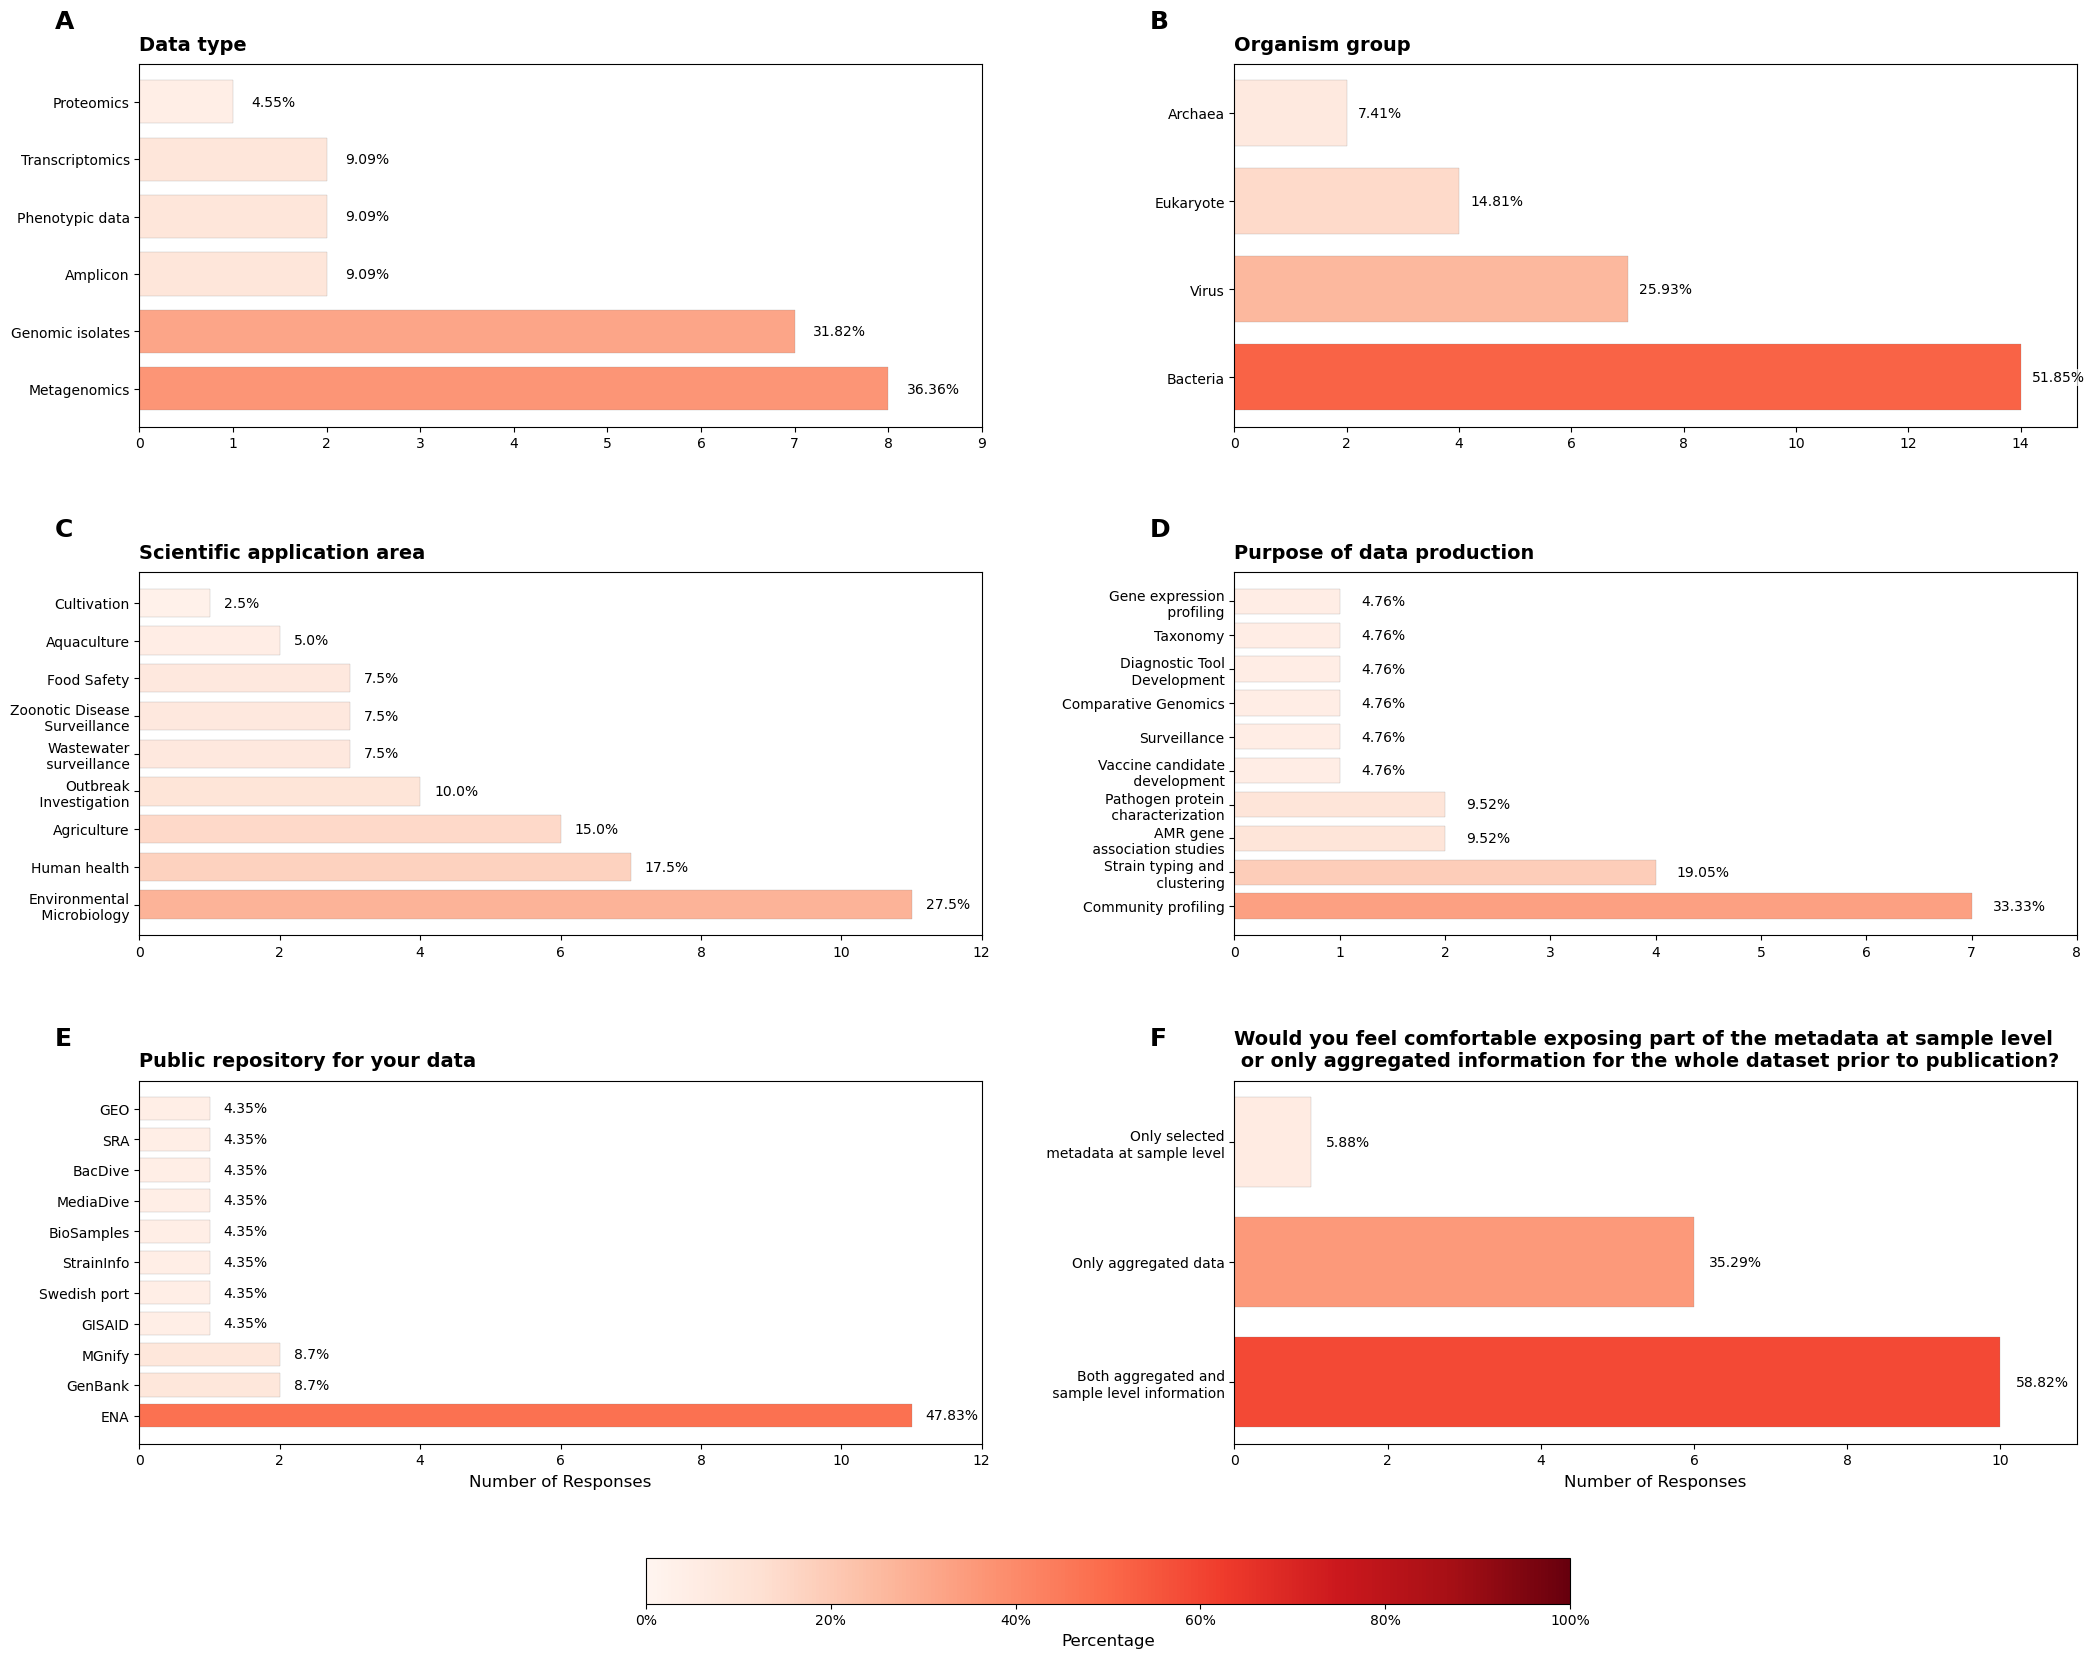

In [9]:
# Function to split labels at word boundaries
def split_label(label, max_length):
    if len(label) <= max_length:
        return label
    split_index = label.rfind(" ", 0, max_length)
    if split_index == -1:
        split_index = max_length
    return '\n'.join([label[:split_index], label[split_index:]])


# Use coolwarm colormap
cmap = plt.colormaps.get_cmap("Reds")

# Calculate the number of rows needed for 2 columns
nrows = (len(dfs) + 1) // 2

# Create a figure and a grid of subplots with 2 columns
fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(25, 20))
axes = axes.flatten() 

title_lim = 75
y_lab_lim = 20

# Iterate over each DataFrame and corresponding axis
for idx, ((col, df), ax) in enumerate(zip(dfs.items(), axes)):
    
    y_labels = [split_label(label, y_lab_lim) for label in df["Values"]]
    
    # Plot bars
    bars = ax.barh(
        y=df["Values"],
        width=df["Count"],
        height=0.75,
        color=cmap(df["Percentage"] / 100),  # Normalize percentage to [0, 1]
        edgecolor="gray", 
        linewidth=0.15,
        zorder=2
    )
    
    # Add labels
    texts = []
    for i, row in df.iterrows():
        texts.append(
            ax.text(
                row["Count"] + 0.2,  # x position: bar width + small offset
                i,  # y position: index of the bar
                f"{row['Percentage']}%",
                ha="left",
                va="center",
                fontsize=10,
                bbox=dict(facecolor="white", alpha=0.7, edgecolor="none", pad=1)
            )
        )

    # Add letter label (A, B, C, etc.) to the top-left corner of the subplot
    ax.text(-0.1, 1.15, string.ascii_uppercase[idx], transform=ax.transAxes,
            fontsize=18, fontweight="bold", va="top")
    
    # Set title
    ax.set_title(split_label(col, title_lim), fontsize=14, loc="left", pad=10, fontweight="bold")

    # Set xlabel only for the last row of subplots
    if idx >= len(dfs) - 2:
        ax.set_xlabel("Number of Responses", fontsize=12, labelpad=5)
    
    # Set y-ticks and limits
    ax.set_yticks(range(len(df)))
    ax.set_yticklabels(y_labels)
    ax.set_xlim(0, max(df["Count"]) + 1)  # Add some padding to the right

# Add colorbar for proportion
norm = plt.Normalize(vmin=0, vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Place the colorbar below all subplots
cbar = fig.colorbar(sm, ax=axes, orientation="horizontal", fraction=0.03, pad=0.15)
cbar.set_label("Percentage", fontsize=12)
cbar.ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
cbar.ax.set_xticklabels(["0%", "20%", "40%", "60%", "80%", "100%"])

# Adjust layout
plt.subplots_adjust(hspace=0.4, wspace=0.3, bottom=0.19)

# Save the figure to a PNG file
file_path = result_dp / "group_work_1.png"
plt.savefig(file_path, format="png", dpi=300, bbox_inches="tight")